In [1]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

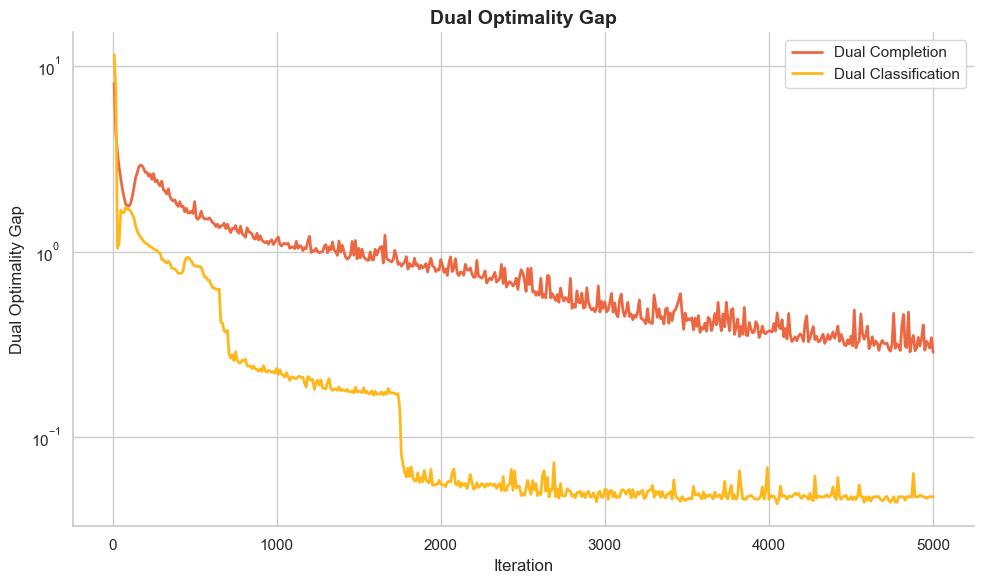

In [5]:
log_dirs = [
    "experiment-output/ch7/dual-completion/learn_primal:False_train:0.8_rho:0.5_rhomax:5000_alpha:10_L:10-1746101439-537432/repeat:0",
    "experiment-output/ch7/dual-classification/learn_primal:False_train:0.8_rho:0.5_rhomax:5000_alpha:10_L:10-1746105611-537175/repeat:0",
]
log_titles = ["Dual Completion", "Dual Classification"]

plot_configs = [
    {"tags": ["Train_obj/dual_obj_optimality_gap"], "title": "Dual Optimality Gap", "ylabel": "Dual Optimality Gap", "ylim": None},
]

TUDelft_palette = [
    (236/255, 104/255, 66/255),   # Red/orange
    (255/255, 184/255, 28/255)    # Yellow
]

sns.set_theme(style="whitegrid", palette=TUDelft_palette)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=False)  # Adjusted figsize for a single plot

for config in plot_configs:
    for idx, (log_dir, log_title) in enumerate(zip(log_dirs, log_titles)):
        reader = SummaryReader(log_dir)
        df = reader.scalars
        for tag in config["tags"]:
            df_tag = df[df['tag'] == tag].sort_values(by='step')
            df_tag['step'] = pd.to_numeric(df_tag['step'])
            df_tag['value'] = df_tag['value'].clip(lower=1e-4)
            sns.lineplot(
                x='step', y='value', data=df_tag, ax=ax, label=log_title, linewidth=2
            )
    ax.set_title(config["title"], fontsize=14, weight='bold')
    ax.set_xlabel('Iteration')
    ax.set_ylabel(config["ylabel"])
    ax.legend()
    ax.set_yscale('log')
    sns.despine(ax=ax)
    if config["ylim"] is not None:
        ax.set_ylim(config["ylim"])

plt.tight_layout()
plt.show()